## Principes fondamentaux de l'importance et de l'impact des fonctionnalités

 Dans la première partie de ce guide, nous avons présenté les concepts, les défis et le but de l'interprétation de l'apprentissage automatique. Ce chapitre donne le coup d'envoi à la deuxième partie, qui se penche sur une vaste gamme de méthodes utilisées pour diagnostiquer les modèles et comprendre leurs données sous-jacentes. 
 
 L'une des plus grandes questions auxquelles répondent les méthodes d'interprétation est : qu'est-ce qui compte le plus pour le modèle et en quoi est-ce important ? Précisément, les méthodes d'interprétation peuvent mettre en lumière l'importance globale des caractéristiques et leur impact, individuellement ou combinées, sur le résultat d'un modèle. Ce chapitre fournira une base théorique et pratique pour aborder ces questions. Dans ce chapitre, nous utiliserons d'abord les paramètres intrinsèques de plusieurs modèles scikit-learn pour dériver les caractéristiques les plus importantes. Ensuite, réalisant à quel point ces résultats sont incohérents, nous apprendrons à utiliser Permutation Feature Importance (PFI)**(Permutation Feature Importance)**  pour classer les caractéristiques de manière intuitive et fiable. 
 
 De plus, pour transmettre l'impact marginal d'une seule caractéristique sur la prédiction, nous étudierons comment rendre et interpréter les diagrammes de dépendance partielle (PDP)** Partial Dependence Plots**. Enfin, nous explorerons les tracés d'espérance conditionnelle individuelle (ICE) ** Individual Conditional Expectation**  pour expliquer les changements avec une prédiction lorsqu'une caractéristique change


 Voici les principaux sujets que nous allons couvrir dans ce chapitre :
 
 * Mesurer l'impact d'une caractéristique sur le résultat
 * Pratiquer le PFI
 * Interpréter les PDP
 * Expliquer les tracés ICE

## La mission

Nous avons tous entendu les stéréotypes : les premiers-nés sont très responsables et autoritaires ; le plus jeune est gâté et insouciant ; et l'enfant du milieu est un introverti jaloux ! Il s'avère que d'éminents chercheurs en psychologie ont contacté votre cabinet de conseil en science des données et ont mené plusieurs petites études empiriques sur la façon dont l'ordre de naissance affecte la personnalité. Mais ils viennent de mettre la main sur un ensemble de données de plus de 40 000 entrées de quiz en ligne du projet Open-Source Psychometrics. Ils sont sceptiques car il a été soumis en ligne et ils n'ont jamais mené d'étude de cette ampleur, c'est donc un territoire inexploré. Pour ces raisons, ils aimeraient qu'un tiers connaissant bien l'apprentissage automatique aborde le problème avec un œil neuf. Ce qu'ils espèrent apprendre concerne toute relation entre les réponses au quiz et l'ordre de naissance, et aussi pour déterminer s'il y a des questions qu'ils pourraient utiliser dans leurs études empiriques, ou même si les quiz en ligne sont une méthode fiable pour commencer. Votre entreprise a accepté de faire la lumière sur ces questions

## Personnalité et rang de naissance

Depuis plus d'un siècle, des théories ont circulé sur la façon dont la dynamique fraternelle et, dans une certaine mesure, les styles parentaux, qui sont eux-mêmes largement définis par le rang de naissance, influencent différents traits de personnalité. La plupart de ces théories ont été formulées et étudiées dans des pays « occidentaux », à commencer par l'Anglais Francis Galton (1874) liant les premiers-nés à une plus grande intelligence, jusqu'aux recherches du Néerlandais Bram Buunk (1997) associant les derniers-nés à une plus grande jalousie. Plus récemment, des études plus nuancées prennent en compte le sexe, les écarts d'âge et le statut socio-économique dans les différences de personnalité. Même alors, ces théories ont rarement un large consensus. En outre, il est connu que la culture a un efeet sur les styles parentaux et la dynamique des frères et sœurs, de sorte que les théories occidentales ne se traduisent pas bien dans d'autres cultures.

D'un autre côté, il existe une série de méthodologies psychométriques utilisées pour évaluer les personnalités, en utilisant des questionnaires pour regrouper les individus en catégories et échelles discrètes. L'ensemble de données comprend des réponses à l'une de ces méthodologies, le test "Big Five" de l'International Personality Item Pool (IPIP). Le test « Big Five » est un modèle largement accepté pour l'évaluation de la personnalité en psychologie universitaire. L'ensemble de données comprend également 26 questions spécialement conçues pour trouver des traits associés à différents ordres de naissance, et bien qu'ils aient les ordres de naissance exacts, les chercheurs ne s'intéressent qu'aux trois catégories suivantes


* Premier-né : le participant est le premier de plusieurs enfants
 Deuxième enfant : le participant n'est ni le premier ni le dernier de plusieurs enfants.
 * Dernier-né : le participant est le dernier de plusieurs enfants. 


 L'ensemble de données d'origine comprend des entrées du monde entier, c'est pourquoi les chercheurs ont demandé de se concentrer spéciquement sur les pays majoritairement anglophones, car les questions sont en anglais. Ils ne peuvent pas vérifier que les questions ne sont pas culturellement biaisées

## L'approche

La tâche à accomplir est de trouver quelles fonctionnalités (réponses au quiz, détails techniques et démographiques) signalent le plus l'ordre de naissance et si elles sont fiables à utiliser à cette fin. Une façon d'y parvenir est de créer des modèles de classification pour prédire l'ordre de naissance, puis de procéder comme suit : 

* Utiliser les paramètres intrinsèques du modèle pour découvrir quelles caractéristiques ont le plus d'impact sur le modèle. Ce concept est appelé importance des caractéristiques, et c'est une méthode d'interprétation modulaire globale. Cela a été expliqué dans le chapitre 2, Concepts clés de l'interprétabilité, mais nous entrerons plus en détail dans ce chapitre


* Explorer davantage l'importance des fonctionnalités avec une méthode basée sur la permutation plus fiable appelée PFI.

* Examiner l'impact marginal sur le résultat des fonctionnalités les plus importantes avec les PDP. De manière simple, nous pouvons dire quelles valeurs de caractéristiques sont les plus corrélées avec les prédictions.

* Obtenir une visualisation plus granulaire de l'impact des caractéristiques individuelles sur les prédictions des modèles avec les tracés ICE

In [ ]:
!pip install --upgrade machine-learning-datasets
!pip install git+https://github.com/SauceCat/PDPbox.git
!pip install --upgrade pycebox

     |████████████████████████████████| 60.3 MB 50 kB/s 
     |████████████████████████████████| 165 kB 36.0 MB/s 
     |████████████████████████████████| 312 kB 41.5 MB/s 
     |████████████████████████████████| 7.1 MB 45.4 MB/s 
     |████████████████████████████████| 49 kB 3.6 MB/s 
     |████████████████████████████████| 394.5 MB 41 kB/s 
     |████████████████████████████████| 28.0 MB 1.4 MB/s 
     |████████████████████████████████| 3.8 MB 21.4 MB/s 
     |████████████████████████████████| 462 kB 74.3 MB/s 
     |████████████████████████████████| 2.9 MB 45.5 MB/s 
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3639 sha256=15b6b6083d7e9143ad1aca3567a6203930cfb3023bd732a6cebf88524161a35b
  Stored in directory: /root/.cache/pip/wheels/cc/0d/0a/06236a41d8f5c3485c1057262de55329e227a0c239fd00d0cd
  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.1.0-py2.py3-none-any.whl size=28052157 sha256=9a4ee4234912b01ae41460ce5a786ef0ba2e2f377081ad1c5

In [ ]:
## Loading the Libraries
import math
import machine_learning_datasets as mldatasets
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model, tree, discriminant_analysis,\
                    ensemble, neural_network, inspection
import matplotlib.pyplot as plt
from pdpbox import pdp
from pycebox.ice import ice, ice_plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Comprendre et préparer les données

Nous chargeons les données dans un dataframe que nous appelons birthorder_df, comme ceci

In [ ]:
birthorder_df = mldatasets.load("personality-birthorder", prepare=True)

https://openpsychometrics.org/_rawdata/FBPS-ValidationData.zip downloaded to /content/data/FBPS-ValidationData.zip
/content/data/FBPS-ValidationData.zip uncompressed to /content/data/FBPS-ValidationData
1 dataset files found in /content/data/FBPS-ValidationData folder
parsing /content/data/FBPS-ValidationData/FBPS-ValidationData/FBPS-ValidationData.csv


prepare=True garantit qu'une certaine préparation des données, telle que le filtrage par pays majoritairement anglophones et l'encodage catégoriel, est effectuée. Ce réglage nous fera gagner du temps. Il devrait y avoir près de 26 000 enregistrements et 97 colonnes. Nous pouvons vérifier que c'était le cas avec print(birthorder_df.shape, qui devrait retourner (25813, 97), correspondant à ce que nous attendions

## Le dictionnaire de données

Nous ne décrirons pas ici toutes les colonnes du dictionnaire de données car il y en a tellement, se rapportant principalement à des questions de personnalité spécifiques. Néanmoins, si vous êtes curieux de connaître ces questions particulières, vous pouvez les trouver dans un fichier appelé FBPS-ValidationData-Codebook.txt, situé ici : https://www.kaggle.com/lucasgreenwell/firstborn-personality-scale-réponses 

Cependant, nous fournirons un bref aperçu des 76 questions psychologiques, six données démographiques, caractéristiques et cinq caractéristiques techniques du dictionnaire de données. Les caractéristiques psychologiques (réponses au quiz) du dictionnaire de données sont décrites comme suit :


* Q1, Q2 , .. Q26 : ordinal ; réponses à 26 questions de recherche sur le rang de naissance (basées sur une échelle de Likert à cinq points allant de 1=Pas d'accord à 3=Neutre à 5=D'accord, ainsi que 0=Pas de réponse).

* EXT1, EXT2,… EXT10 ; EST1, EST2,… EST10 ; AGR1, AGR2,… AGR10 ; CSN1, CSN2,… CSN10 ; OPN1, OPN2,… OPN10 : Ordinal ; le questionnaire IPIP "Big Five". Il est composé de 50 questions (réponses également sur une échelle de Likert en cinq points allant de 1=Pas d'accord à 3=Neutre à 5=D'accord, ainsi que 0=Pas de réponse).


Les caractéristiques démographiques du dictionnaire de données sont décrites comme suit : 

* age : ordinal ; âge du participant en années
* engnat : Binaire ; si l'anglais est leur langue maternelle (1=oui, 2=non)
* gendre : catégorique ; genre (masculin, féminin, autre, non défini)
* birthn : ordinal ; nombre total d'enfants de parents de 1 à 10, 11 (pour les autres)
* country : catégorique ; pays du participant (par code à deux lettres)
* birthorder : Ordinal ; rang de naissance cible (1 : premier-né, 2 : deuxième enfant et 3 : dernier-né)

Les caractéristiques techniques du dictionnaire de données sont décrites comme suit : 

* source : catégoriel ; comment l'utilisateur est arrivé au test de personnalité basé sur un référent HTTP (HyperText Transfer Protocol) (1=directement de Google, 2=page d'accueil du site Web, 3=tout autre)

* screensize : ordinal ; taille de l'écran utilisé pour passer le test (2=supérieur à 600 pixels (px) de chaque côté, 1=inférieur à cela)

* introelapse : continu ; temps passé sur la page de destination du test de personnalité (en secondes)

* testelapse : continu ; temps passé sur le corps principal du test de personnalité (en secondes)
* endelaps : continu ; temps passé sur la page de sortie du test de personnalité (en secondes)


Si vous venez de réaliser que les caractéristiques du dictionnaire de données (87) ne correspondent pas au nombre total de colonnes (97) dans l'ensemble de données, c'est parce que les trois caractéristiques catégorielles étaient déjà encodées de manière catégorique à l'aide d'un codage à chaud. Ce processus crée des fonctionnalités individuelles pour chaque catégorie afin qu'elles soient représentées dans le modèle d'apprentissage automatique, ajoutant de l'expressivité et de la précision. Les coder en tant que tels signifie également que vous pouvez les interpréter indépendamment

## Préparation des données 

Étant donné que la plupart de la préparation des données a été effectuée automatiquement, il ne nous reste plus qu'à former/tester la division des données. Mais tout d'abord, nous initialisons rand, une constante qui nous servira de random_state tout au long de cet exercice. Ensuite, nous définissons y comme la colonne d'ordre de naissance et X comme tout le reste, suivis de la division de ces deux en ensembles de données d'entraînement et de test avec train_test_split, comme illustré dans l'extrait de code suivant

In [ ]:
rand = 9
y = birthorder_df['birthorder']
X = birthorder_df.drop(['birthorder'], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rand)

Nous avons terminé toutes les étapes de compréhension et de préparation des données, nous pouvons donc maintenant passer aux sujets mentionnés dans l'aperçu

## Mesurer l'impact d'une fonctionnalité sur le résultat

Pour cet exercice, nous adaptons les données d'apprentissage à six classes de modèles différentes : arbres de décision, gradient boosting trees, forêt aléatoire, régression logistique, perceptron multicouche et analyse discriminante linéaire (LDA). Nous avons entendu parler des cinq premiers au chapitre 3, Défis d'interprétation, nous allons donc prendre un moment pour nous familiariser avec le dernier, détaillé ici


* lda : LDA est une méthode très polyvalente. Il fait certaines des mêmes hypothèses que la régression linéaire a sur la normalité et l'homoscédasticité; cependant, elle découle de la réduction de la dimensionnalité et est étroitement liée à la méthode non supervisée de l'analyse en composantes principales (ACP). Il calcule la distance entre la moyenne des différentes classes, appelée variance inter-classe, et la variance au sein de chaque classe, appelée variance intra-classe, il projette les données dans un espace de dimension inférieure de telle manière qu'il maximise les distances entre les classes et minimise la distance au sein des classes. Si vous avez plus de trois caractéristiques, il est difficile d'imaginer le concept de séparabilité des classes, mais disons que vous avez pris tous vos points de données et que vous les avez réduits à seulement deux dimensions. Ensuite, il existe un moyen de les projeter dans cet espace de dimension inférieure où vos points de données sont organisés de manière à ce que vous ayez suffisamment de séparation entre les classes. Vous pouvez tracer une ligne entre eux (en maximisant la variance entre les classes) et le faire en rapprochant les points de chaque classe (en minimisant la variance au sein de la classe). Outre la classification, LDA peut être utilisé pour la réduction de la dimensionnalité et la visualisation de la séparation des classes.


Maintenant, nous plaçons les modèles scikit-learn dans un dictionnaire Python (class_models) afin que nous puissions les parcourir, former, évaluer et enregistrer nos résultats dans la même structure de dictionnaire, comme suit

In [ ]:
class_models = {  
        #Tree
        'decision_tree':{'model': tree.\
                         DecisionTreeClassifier(max_depth=6, random_state=rand,\
                                                class_weight='balanced')},
        #Ensemble Methods
        'gradient_boosting':{'model':ensemble.\
                             GradientBoostingClassifier(n_estimators=200,\
                                                        max_depth=4, subsample=0.5,\
                                                        learning_rate=0.05)},
        'random_forest':{'model':ensemble.\
                         RandomForestClassifier(max_depth=11, n_estimators=300,\
                                                max_features='sqrt', random_state=rand)},
        #Generalized Linear Models (GLMs)
        'logistic':{'model': linear_model.\
                    LogisticRegression(multi_class='ovr', solver='lbfgs',\
                                       class_weight='balanced', max_iter=500)},
        #Discriminant Analysis
        'lda':{'model':discriminant_analysis.\
               LinearDiscriminantAnalysis(n_components=2)},
        #Neural Networks
        'mlp':{'model':make_pipeline(StandardScaler(), neural_network.\
                                     MLPClassifier(hidden_layer_sizes=(11,),\
                                                   early_stopping=True, random_state=rand,\
                                                   validation_fraction=0.25, max_iter=500))}
    }

Chacun des modèles a des hyperparamètres qui ont déjà été réglés pour des raisons spéciques. Par exemple, LDA effectue une réduction de dimensionnalité sur deux dimensions (n_components=2) car il y a trois classes et il ne doit pas dépasser ou égaler le nombre de classes, et une n'est pas suffisante pour capturer la variance dans les 96 caractéristiques. En parlant de classes, celles-ci ne sont pas également réparties, c'est pourquoi certaines d'entre elles ont class_weight='balanced' appliqué à des classes de poids inversement proportionnelles à leurs fréquences pendant l'entraînement. L'équilibrage permet d'améliorer la précision et le rappel pour les classes moins représentées.


La régression logistique est livrée avec cinq solveurs différents. Chaque solveur approche les poids des paramètres de recherche pour minimiser la fonction de coût (log de vraisemblance négative) de manière différente. Celui utilisé est appelé Broyden-Fletcher-Goldfarb-Shanno à mémoire limitée (L-BFGS) (solver='lbfgs'). Il a été choisi parce qu'il est efficace et pour aucune autre raison. Presque tous les autres paramètres ont été choisis pour éviter le overtting, tels que max_depth, n_estimators, subsample, learning_rate et max_features.


Ensuite, nous itérons chaque modèle dans le dictionnaire class_models. Nous adaptons les données d'entraînement au modèle et utilisons la prédiction pour faire des prédictions pour les ensembles de données d'entraînement et de test. Nous pouvons ensuite enregistrer le modèle ajusté dans l'ensemble de données et utiliser plusieurs mesures de performance telles que l'exactitude, le rappel, la précision, le score F1 et le coefficient de corrélation de Matthews (MCC). Nous avons couvert ces métriques au chapitre 3, Défis d'interprétation, mais cette fois, puisqu'il s'agit d'un problème de classification multiclasse, nous utilisons moyenne='pondérée' pour pondérer la métrique en fonction des fréquences de classe. Par exemple, il n'y a pas une métrique Recall_score mais trois (une pour chaque classe), donc ce qu'elle fait est d'effectuer une moyenne pondérée.

In [ ]:
for model_name in class_models.keys():
    fitted_model = class_models[model_name]['model'].fit(X_train, y_train) 
    y_train_pred = fitted_model.predict(X_train)
    y_test_pred = fitted_model.predict(X_test)
    class_models[model_name]['fitted'] = fitted_model
    class_models[model_name]['preds'] = y_test_pred
    class_models[model_name]['Accuracy_train'] =\
        metrics.accuracy_score(y_train, y_train_pred)
    class_models[model_name]['Accuracy_test'] =\
        metrics.accuracy_score(y_test, y_test_pred)
    class_models[model_name]['Recall_train'] =\
        metrics.recall_score(y_train, y_train_pred, average='weighted')
    class_models[model_name]['Recall_test'] =\
        metrics.recall_score(y_test, y_test_pred, average='weighted')
    class_models[model_name]['Precision_train'] =\
        metrics.precision_score(y_train, y_train_pred, average='weighted')
    class_models[model_name]['Precision_test'] =\
        metrics.precision_score(y_test, y_test_pred, average='weighted')
    class_models[model_name]['F1_test'] =\
        metrics.f1_score(y_test, y_test_pred, average='weighted')
    class_models[model_name]['MCC_test'] =\
        metrics.matthews_corrcoef(y_test, y_test_pred)

Une fois que nous avons toutes nos métriques dans le dictionnaire class_models, nous pouvons convertir ce dictionnaire en DataFrame à l'aide de from_dict. Nous pouvons trier ce DataFrame via MCC, en utilisant sort_values ​​et le codage couleur de tout le reste, puis en utilisant style.background_gradient, avec le code suivant

In [ ]:
class_metrics = pd.DataFrame.\
    from_dict(class_models, 'index')[['Accuracy_train', 'Accuracy_test',\
                                      'Recall_train', 'Recall_test',\
                                      'Precision_train', 'Precision_test',\
                                      'F1_test', 'MCC_test']]
with pd.option_context('display.precision', 3):
    html = class_metrics.sort_values(by='MCC_test', ascending=False).style.\
        background_gradient(cmap='plasma', low=0.43, high=0.63,\
                            subset=['Accuracy_train', 'Accuracy_test']).\
        background_gradient(cmap='viridis', low=0.63, high=0.43,
                            subset=['F1_test'])
html

,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_test,MCC_test
decision_tree,0.497,0.464,0.497,0.464,0.541,0.494,0.441,0.246
gradient_boosting,0.627,0.498,0.627,0.498,0.638,0.493,0.485,0.236
logistic,0.497,0.493,0.497,0.493,0.499,0.494,0.492,0.232
mlp,0.522,0.494,0.522,0.494,0.517,0.485,0.480,0.223
lda,0.501,0.492,0.501,0.492,0.500,0.489,0.477,0.201
random_forest,0.912,0.484,0.912,0.484,0.921,0.478,0.447,0.198


Dans la figure, la précision du test ne semble pas si impressionnante, mais veuillez noter que pour interpréter correctement la précision, nous devons examiner le taux d'absence d'information (NIR), également connu sous le nom de taux d'erreur nul.


Pour mettre le NIR dans un exemple concret, disons que nous avons affaire à un problème de classification d'images, et 85% de notre ensemble de données comprend des images de chiens, tandis que 15% sont des chats. 

Les chiens sont donc la classe majoritaire. Si nous étions paresseux, nous pourrions prédire que toutes les images sont des chiens et atteindre toujours un taux de précision de 85 %. Le NIR est la précision que nous obtiendrions si nous prédisions paresseusement que toutes les observations appartiennent à la classe majoritaire. Pour calculer le NIR, il suffit de diviser le nombre d'observations dans la classe majoritaire (y_train[y_train==1].shape[0]) par le nombre total d'observations (y_train.shape[0]), comme illustré dans l'extrait de code suivant

In [ ]:
print('NIR: %.4f' %\
      (y_train[y_train==1].shape[0]/y_train.shape[0]))

NIR: 0.4215


Nous devons nous efforcer d'atteindre des précisions supérieures à ce nombre, et elles le sont toutes, mais pas avec une marge énorme. Étant donné que les modèles ont été réglés pour augmenter les performances prédictives, c'est décevant, mais ce n'était pas l'objet de cet exercice. 

Il était important de dépasser le NIR car sinon, les modèles ne valent pas mieux que notre meilleure estimation "paresseuse". Sinon, cela signifie que nous devons nous interroger sur la complexité de nos modèles, les méthodes de régularisation choisies et la sélection des caractéristiques, sans parler même de la qualité de nos données et de la validité de nos hypothèses. Cependant, ce que nous essayons de faire ici, c'est d'exploiter la capacité du modèle à découvrir des relations latentes entre les variables pour nous aider à relier les points entre les réponses au quiz et l'ordre de naissance, s'ils peuvent être connectés du tout


Dans tous les cas, la précision n'est pas la seule métrique qui compte. Nous avons également pondéré les scores de rappel, de précision et de F1. Ils ne sont pas particulièrement impressionnants, mais comme nous n'avons aucune préférence pour les faux positifs par rapport aux faux négatifs, Precision et Recall ont la même valeur pour nous, il est donc bon qu'ils soient plus ou moins égaux. Seuls les arbres de décision ont une marge plus élevée entre eux. Pour le reste des modèles, puisque le score F1 est la moyenne harmonique de la précision et du rappel, il s'agit, sans surprise, d'un nombre similaire. D'un autre côté, MCC décrit très bien nos performances prédictives, car il indique que nos modèles se situent à environ 20 % dans l'intervalle entre une prédiction aussi bonne que aléatoire et une prédiction parfaite. N'oubliez pas que le MCC varie entre -1 si chacune de nos prédictions était fausse à 1 si elles étaient bonnes, et 0 si elles étaient aussi bonnes qu'aléatoires


Une autre chose à noter est que la plus grande taille du train par rapport au test pour chacune de ces métriques nous indique à quel point notre modèle est overtting. Il est souvent difficile de trouver le bon endroit où vous maximisez la précision du test sans trop en abuser, comme le sont gradient_boosting et random_forest. Si nous avions l'intention de produire ces modèles, il faudrait y prêter une grande attention, mais ce n'est pas le but de cet exercice. Notre objectif est de tirer parti de ces modèles comme outils de découverte des connaissances

## Importance des fonctionnalités pour les modèles arborescents : 

trois de nos modèles sont plus faciles à utiliser. Pour tous les modèles basés sur des arbres (même ceux regroupés), l'importance des caractéristiques a déjà été calculée à l'aide d'une somme pondérée des diminutions de l'impureté des nœuds. L'impureté du nœud est l'une des métriques utilisées pour décider comment diviser une branche. Il vous indique dans quelle mesure un nœud appartient à une seule classe, allant de 100 % impur lorsqu'il est divisé uniformément à 0 % d'impur lorsqu'il appartient à une seule classe. Pour obtenir l'importance de la caractéristique des trois modèles, tout ce que nous avons à faire est de référencer l'attribut feature_importances_ dans le modèle ajusté. Nous prendrons ces importances et les enregistrerons avec les noms de leurs caractéristiques dans un DataFrame pour chaque autre modèle : Arbre de décision (dt_imp_df), Arbres à gradient de gradient (gb_imp_df) et Forêt aléatoire (rf_imp_df), comme suit

In [ ]:
dt_imp_df = pd.DataFrame({\
                'name': X_train.columns,
                'dt_imp': class_models['decision_tree']['fitted'].\
                          feature_importances_})
gb_imp_df = pd.DataFrame({\
                'name': X_train.columns,
                'gb_imp': class_models['gradient_boosting']['fitted'].\
                          feature_importances_})
rf_imp_df = pd.DataFrame({\
                'name': X_train.columns,
                'rf_imp': class_models['random_forest']['fitted'].\
                         feature_importances_})

Il y a 96 caractéristiques, et l'importance des caractéristiques pour les trois modèles n'est pas à la même échelle en raison des différences dans les structures arborescentes. Il est préférable d'interpréter l'importance des caractéristiques comme une mesure relative, pour comparer une caractéristique avec d'autres, mais pas entre différents modèles. Par conséquent, au lieu de comparer ces mesures, nous pouvons comparer leur rang. Nous pouvons utiliser la fonction de classement des pandas pour calculer le classement des mesures d'importance dans chaque modèle pour chaque fonctionnalité et les enregistrer en tant que DataFrame. Il le fait sans changer l'ordre des fonctionnalités, car elles ne sont pas triées

In [ ]:
dt_rank_df = pd.DataFrame({'dt_rank':\
                           dt_imp_df['dt_imp'].\
                           rank(method='first',\
                                ascending=False).astype(int)})
gb_rank_df = pd.DataFrame({'gb_rank':\
                           gb_imp_df['gb_imp'].\
                           rank(method='first',\
                                ascending=False).astype(int)})
rf_rank_df = pd.DataFrame({'rf_rank':\
                           rf_imp_df['rf_imp'].\
                           rank(method='first',\
                                ascending=False).astype(int)})

Concaténons maintenant chaque DataFrame d'importance de caractéristique avec son DataFrame de rang correspondant et fusionnons-les tous dans un dataframe appelé tree_ranks_df, qui a la mesure d'importance de caractéristique et le rang de cette importance pour chaque modèle. Nous pouvons faire la moyenne de tous les rangs (avg_rank), puis les trier en fonction de cela afin que nous puissions voir les caractéristiques les plus importantes, en moyenne, le premier. Le code est illustré dans l'extrait suivant

In [ ]:
tree_ranks_df = pd.merge(\
                    pd.merge(\
                        pd.concat((dt_imp_df, dt_rank_df), axis=1),\
                        pd.concat((gb_imp_df, gb_rank_df), axis=1),\
                        'left'),\
                    pd.concat((rf_imp_df, rf_rank_df), axis=1),\
                    'left')
tree_ranks_df['avg_rank'] = (tree_ranks_df['dt_rank'] +\
                            tree_ranks_df['gb_rank'] + \
                            tree_ranks_df['rf_rank'])/3
tree_ranks_df.sort_values(by='avg_rank')

,name,dt_imp,dt_rank,gb_imp,gb_rank,rf_imp,rf_rank,avg_rank
28,birthn,0.851533,1,0.370855,1,0.196067,1,1.000000
81,testelapse,0.013708,3,0.036988,2,0.027307,2,2.333333
26,age,0.006679,7,0.032409,3,0.025065,3,4.333333
0,Q1,0.025340,2,0.023322,6,0.016135,6,4.666667
80,introelapse,0.005056,9,0.028625,4,0.022142,5,6.000000
...,...,...,...,...,...,...,...,...
89,country_GB,0.000000,90,0.001478,89,0.002023,91,90.000000
86,gender_other,0.000000,88,0.000953,94,0.000678,94,92.000000
91,country_NZ,0.000000,92,0.000998,93,0.000690,93,92.666667
83,gender_undefined,0.000000,87,0.000199,96,0.000241,96,93.000000


Comme vous pouvez le voir, il existe des similitudes entre les rangs de l'arbre de décision (dt_rank), des arbres à gradient renforcé (dt_rank) et de la forêt aléatoire (rf_rank), en particulier pour les deux derniers. En effet, les mesures d'importance ne semblent pas être sur la même échelle, nous avons donc plutôt utilisé l'approche des classements par comparaison. Une autre approche aurait consisté à mettre à l'échelle min-max les mesures d'importance de sorte que leurs valeurs les plus basses soient 0 et les plus élevées soient 1, mais cela en révélerait plus sur la distance relative en importance entre les entités et moins sur l'ordre. En ce moment, nous sommes plus intéressés par la commande


En plus d'être spécifiques au modèle, les méthodes d'importance des caractéristiques des modèles arborescents sont basées sur les impuretés. C'est également un inconvénient car l'impureté les rend intrinsèquement biaisés vers des caractéristiques de cardinalité supérieure. Les entités qui sont d'une cardinalité plus élevée sont celles qui ont des valeurs plus uniques. Par exemple, dans cet exemple, il y a 72 âges différents représentés dans notre ensemble de données, alors que chaque question a cinq ou six valeurs uniques, et toutes les valeurs de pays et de genre telles que county_GB et gender_undefined sont binaires, donc deux valeurs uniques . Vous devez vous demander si la raison de l'âge est plus importante, selon le classement moyen, que n'importe quelle question, et chaque question est plus importante que les caractéristiques binaires à cause de ce biais

## Importance des fonctionnalités pour la régression logistique

Nous avons déjà couvert l'importance des fonctionnalités pour la régression logistique dans les deux chapitres précédents. Vous avez appris qu'un modèle de régression logistique ajustée a des coefficients, et ces coefficients peuvent être des indices utiles pour déterminer quelle caractéristique est la plus importante. Cependant, cette fois, il y a une torsion. Imprimons la forme de la propriété coef_ pour le modèle ajusté, comme suit

In [ ]:
print(class_models['logistic']['fitted'].coef_.shape)

(3, 96)


Il s'avère qu'il existe trois ensembles de coefficients ! Mais pourquoi?! Il y a trois ensembles car ce modèle n'est pas un mais trois classeurs en un. Si vous revenez à la définition du modèle, vous pouvez voir où il est écrit multi_class='ovr'. OvR signifie One-vs-Rest, et ce qu'il fait dans les coulisses est de prédire indépendamment les classes des premiers-nés, des enfants du milieu et des derniers-nés. En d'autres termes, chacun a son propre problème de classification binaire. Ensuite, il compare les probabilités prédites pour chaque classe pour chaque observation, et celle avec la possibilité la plus élevée est la classe prédite. OvR est la façon dont vous vous retrouvez avec trois ensembles de coefficients, et ces coefficients ne peuvent que vous dire les caractéristiques les plus importantes pour prédire chaque classe

Comme expliqué dans le chapitre 2, Concepts clés d'interprétabilité, les coeffcients sont les log-cotes augmentées par chaque unité supplémentaire d'une caractéristique qu'une classe est une correspondance positive, si toutes les autres caractéristiques restent les mêmes. Dans cet exemple, nous avons trois ensembles de coeffcients correspondant aux prédictions pour chaque classe. Par conséquent, le premier ensemble de coeffcients vous indique à travers l'augmentation des log-cotes pour chaque unité supplémentaire pour chaque caractéristique que le participant est un premier-né. S'il est négatif, il signale une diminution du log-odds pour chaque unité supplémentaire


Puisque nous n'avons pas adapté notre modèle aux données normalisées, toutes nos caractéristiques ont des échelles différentes, et c'est pourquoi, pour tenir compte de cela, nous pouvons multiplier chaque coeffcient par son écart type pour approximer l'importance des caractéristiques. Le chapitre 3, Défis d'interprétation, a expliqué pourquoi il ne s'agit que d'une approximation, et il n'y a pas de consensus sur la meilleure méthode pour obtenir l'importance des caractéristiques pour la régression logistique. Sachant cela, nous pouvons d'abord calculer les écarts types (stdv) et créer un nouveau DataFrame, lr_imp_df, où nous plaçons les coecients pour chaque classe multipliés par les écarts types à côté du nom de l'entité

In [ ]:
stdv = np.std(X_train, 0)
lr_imp_df = pd.DataFrame({\
                'name': X_train.columns,\
                'first_coef_norm':\
                          class_models['logistic']['fitted'].coef_[0] * stdv,\
                'middle_coef_norm':\
                          class_models['logistic']['fitted'].coef_[1] * stdv,\
                'last_coef_norm':\
                          class_models['logistic']['fitted'].coef_[2] * stdv}).\
            reset_index(drop=True)

Pour évaluer l'impact de chaque caractéristique sur le modèle, nous pouvons les peser avec les priors, c'est-à-dire dans quelle mesure chaque classe est représentée dans l'ensemble de données. Heureusement, le modèle ajusté pour LDA enregistre cela en tant qu'attribut priors_. Nous pouvons enregistrer cela dans notre propre variable class_priors, comme ceci

In [ ]:
class_priors = class_models['lda']['fitted'].priors_
print(class_priors)

[0.42147566 0.23701862 0.34150572]


Comme apprécié par le tableau class_priors, les premiers-nés représentent 42 % de tous les participants, les enfants du milieu 24 % et les derniers-nés les 34 % restants. Nous pouvons utiliser ce tableau pour créer une moyenne pondérée, en utilisant la valeur absolue des coefficients appelés coef_weighted_avg. Dans l'extrait de code suivant, nous utilisons la valeur absolue pour cette moyenne pondérée, car nous ne voulons pas savoir si elle augmente ou diminue les probabilités de log, uniquement dans la mesure où elle le fait.

In [ ]:
lr_imp_df['coef_weighted_avg'] = (abs(lr_imp_df['first_coef_norm']) * class_priors[0]) +\
                                 (abs(lr_imp_df['middle_coef_norm']) * class_priors[1]) +\
                                 (abs(lr_imp_df['last_coef_norm']) * class_priors[2])

La moyenne pondérée que nous venons de produire n'est qu'une approximation de l'importance des caractéristiques afin que nous puissions trier les caractéristiques de la plus haute à la plus faible. Nous allons le faire ensuite avec sort_values ​​et coder en couleur les colonnes coefficientes avec background_gradient pour faciliter l'appréciation des différences de valeurs au sein de chaque colonne, comme suit

In [ ]:
lr_imp_df.\
    sort_values(by='coef_weighted_avg', ascending=False).style.\
    background_gradient(cmap='viridis', low=-0.1, high=0.1,\
                        subset=['first_coef_norm',\
                                'middle_coef_norm', 'last_coef_norm'])

,name,first_coef_norm,middle_coef_norm,last_coef_norm,coef_weighted_avg
28,birthn,-0.411083,1.353742,-0.406332,0.632888
0,Q1,0.110078,0.022436,-0.149017,0.102603
12,Q13,0.078983,-0.038239,-0.063699,0.064106
15,Q16,0.059966,-0.053943,-0.027475,0.047442
19,Q20,-0.060608,0.050758,0.022708,0.045330
1,Q2,0.019332,-0.080619,0.048795,0.043920
9,Q10,0.049491,-0.018806,-0.045741,0.040937
26,age,0.054843,-0.026698,-0.029064,0.039369
39,EST1,0.049500,-0.062194,-0.002981,0.036622
40,EST2,-0.051143,-0.005851,0.039465,0.036420


dans la figure, l'ordre exact n'a pas toujours autant d'importance que les caractéristiques qui se trouvent en haut (très pertinentes), celles qui sont tout en bas (non pertinentes) et celles qui se situent quelque part entre les deux (plutôt pertinentes). Quant aux coefficients de chaque classe, nous pouvons les interpréter par lesquels sont positifs ou négatifs, et plus ou moins selon quelle amplitude — par exemple, nous savons que la naissance est négativement corrélée à une correspondance positive pour les premiers-nés. Cette perspicacité est intuitivement logique. Plus le nombre d'enfants d'une famille est élevé, moins il est probable que l'un d'eux soit le premier-né. Il en va de même pour les derniers-nés : seules les chances d'avoir un enfant du milieu augmentent à mesure que le nombre d'enfants augmente. À mesure que l'âge augmente, les chances d'être un dernier-né diminuent. Cette conclusion est également logique parce que les familles étaient auparavant plus nombreuses, mais on ne sait pas pourquoi elle augmente pour les premiers-nés. Cependant, nous aurions besoin d'un outil différent pour mieux examiner cela


Nous pouvons également dire que l'accord avec l'énoncé de la question 1 (Q1), qui dit « j'ai lu un nombre absurde de livres » et de la question 13 (Q13), qui dit « je dirige les gens autour » augmente les chances que le participant soit le premier-né. De plus, la question 20 (Q20), qui dit « Je n'ai pas besoin des éloges des autres », augmente les chances qu'il s'agisse d'un enfant du milieu. Vous pouvez dire que les classes sont pour la plupart opposées les unes aux autres bien qu'elles aient été classées séparément, et, naturellement, il y a très peu de cas dans lesquels les coefficients pour les trois classes pour une caractéristique sont tous positifs ou tous négatifs


Cette méthode d'importance des caractéristiques spécifiques au modèle n'est pas très fiable pour évaluer l'importance de toutes les caractéristiques de manière holistique, pour toutes les classes. De plus, étant donné que le modèle est la régression logistique, il fait quelques hypothèses sur les données qui pourraient ne pas être vraies, telles que peu ou pas de multicolinéarité entre les caractéristiques et une relation linéaire avec les log-cotes. Cependant, si ces hypothèses sont plus ou moins correctes, l'avantage de la Régression Logistique OvR réside dans la séparation entre les classes. Vous pouvez examiner comment chaque caractéristique se rapporte à chaque classe indépendamment

## Importance des fonctionnalités pour les LDA

A avec la régression logistique OvR, nous pouvons également extraire trois ensembles de coefficients pour chaque fonctionnalité pour les LDA. Pour vérifier, examinez la forme, comme ceci

In [ ]:
class_models['lda']['fitted'].coef_.shape

(3, 96)

Il devrait sortir (3, 96). La différence réside dans la signification de ces coefficients. Ils nous disent combien chaque caractéristique pèse dans la séparabilité de la classe. Plus la valeur absolue du coefficient est élevée, plus cette caractéristique aide à séparer cette classe. D'un autre côté, une valeur absolue inférieure du coefficient indique que la caractéristique ne contribue pas à la séparabilité des classes. Après tout, LDA est comme PCA, mais il décompose les caractéristiques en séparation et non en corrélation.


Pour examiner ces coefficients, nous pouvons créer un nouveau DataFrame, lda_imp_df, où nous plaçons les coefficients pour chaque classe multipliés par l'écart type à côté du nom de la fonctionnalité, comme suit

In [ ]:
lda_imp_df = pd.DataFrame({\
                'name': X_train.columns,\
                'first_coef_norm':\
                          class_models['lda']['fitted'].coef_[0] * stdv,\
                'middle_coef_norm':\
                          class_models['lda']['fitted'].coef_[1] * stdv,\
                'last_coef_norm':\
                          class_models['lda']['fitted'].coef_[2] * stdv}).\
            reset_index(drop=True)

Nous pouvons maintenant faire la même chose qu'avec la régression logistique et créer une moyenne pondérée de la valeur absolue des coefficients (coef_weighted_avg), en utilisant la variable class_priors. Nous faisons cela dans le seul but de pouvoir trier le tableau et d'obtenir une compréhension approximative des caractéristiques les plus importantes, tout en reconnaissant qu'il ne s'agit pas d'une science exacte.

In [ ]:
lda_imp_df['coef_weighted_avg'] = (abs(lda_imp_df['first_coef_norm']) * class_priors[0]) +\
                                 (abs(lda_imp_df['middle_coef_norm']) * class_priors[1]) +\
                                 (abs(lda_imp_df['last_coef_norm']) * class_priors[2])

Nous pouvons maintenant utiliser la moyenne pondérée (coef_weighted_avg) pour trier les caractéristiques et les coder par couleur de la même manière que nous l'avons fait pour la régression logistique, comme suit :

In [ ]:
lda_imp_df.\
    sort_values(by='coef_weighted_avg', ascending=False).style.\
    background_gradient(cmap='viridis', low=-0.1, high=0.1,\
                        subset=['first_coef_norm',\
                                'middle_coef_norm', 'last_coef_norm'])

,name,first_coef_norm,middle_coef_norm,last_coef_norm,coef_weighted_avg
28,birthn,-0.315051,1.002922,-0.307242,0.475423
0,Q1,0.090613,-0.012808,-0.102942,0.076382
12,Q13,0.056740,-0.033932,-0.046477,0.047829
51,AGR3,-0.039195,-0.005623,0.052276,0.035705
15,Q16,0.038815,-0.035811,-0.023050,0.032719
6,Q7,-0.004032,0.064381,-0.039707,0.030519
16,Q17,0.035050,-0.009894,-0.036390,0.029545
24,Q25,-0.034672,0.034036,0.019169,0.029227
77,OPN9,-0.033481,0.045381,0.009825,0.028223
19,Q20,-0.030615,0.038022,0.011395,0.025807


Dans la figure générée par le code précédent, vous pouvez comprendre que bon nombre des mêmes fonctionnalités qui figuraient dans le top 10 pour la régression logistique sont également dans le top 10 pour LDA. Vous pouvez également voir des modèles similaires entre les classes, tels que l'enfant du milieu étant beaucoup plus aligné avec birthn qu'autre chose, tandis que les deux autres classes ont plus d'équilibre dans les caractéristiques qui aident à les prédire.


Semblable à la régression logistique OvR, l'importance des caractéristiques LDA a l'inconvénient d'être spécifique au modèle et aux hypothèses formulées par le modèle LDA. LDA suppose peu ou pas de multicolinéarité entre les caractéristiques et la normalité multivariée, c'est-à-dire que les caractéristiques sont distribuées normalement pour chaque classe. Il partage également le même avantage principal de la régression logistique OvR, de pouvoir observer comment chaque caractéristique se rapporte à chaque classe. Cependant, LDA est plus robuste aux violations d'hypothèses et, par conséquent, peut être utilisé avec des données plus bruyantes. Cela étant dit, l'analyse discriminante quadratique (AQD) est encore meilleure dans de tels cas. QDA est comme LDA, mais ne fait aucune hypothèse de normalité et divise les classes avec une limite de décision quadratique plutôt que linéaire

## Importance des caractéristiques pour les réseaux Perceptron

Neural multicouches manquent d'attributs intrinsèques qui peuvent aider sans effort à déterminer l'importance des caractéristiques, comme dans d'autres classes de modèles. Cela devient plus compliqué, même pour cet exemple de couche cachée unique, car il existe deux ensembles de matrices de poids correspondant à chaque couche, comme illustré dans l'extrait de code suivant

In [ ]:
print(class_models['mlp']['fitted'][1].coefs_[0].shape)
print(class_models['mlp']['fitted'][1].coefs_[1].shape)

(96, 11)
(11, 3)


Les poids dans chaque matrice peuvent être trompeurs car ils peuvent être amplifiés ou atténués les uns par les autres. Si vous effectuez une production par points de ces deux matrices ensemble et que vous les transposez, vous en obtiendrez une avec la forme familière (96, 3), avec des cellules correspondant à chaque combinaison de caractéristiques et de classes, que nous avons utilisée pour la régression logistique et la LDA. Cependant, ce n'est pas précisément comment les poids sont utilisés pour prédire pendant la propagation vers l'avant. Pour commencer, il existe des fonctions d'activation non linéaires telles que relu et softmax entre et après ces opérations matricielles. En supposant que la formation ait été effectuée avec des données normalisées, il a été proposé de prendre la somme des produits absolus des poids et la somme des produits des poids sans les valeurs absolues. Il existe des schémas plus élaborés impliquant la pondération et la normalisation des poids, mais ils ignorent l'effeet de la fonction d'activation de la couche cachée


La conclusion est qu'il n'y a pas de consensus sur la façon d'extraire l'importance des caractéristiques des paramètres intrinsèques d'un réseau de neurones. Comme nous le verrons plus loin dans ce guide, il existe d'autres aspects intrinsèquement interprétables d'un réseau de neurones, par exemple les cartes de saillance au chapitre 8, Visualiser les réseaux de neurones convolutifs, et les gradients intégrés au chapitre 9, Méthodes d'interprétation pour la prévision multivariée et l'analyse de sensibilité.


Bien que nous ayons pu tirer parti des paramètres intrinsèques pour obtenir l'importance des fonctionnalités pour tous les autres modèles, les méthodes utilisées étaient incohérentes. Par conséquent, les résultats n'étaient pas seulement différents à cause des différences dans les modèles mais aussi à cause des différences dans les méthodes. Alors, quelle serait une méthode fiable pour calculer l'importance des caractéristiques pour n'importe quel modèle ? C'est ce qu'on appelle PFI, et nous couvrirons ce prochain

## La pratique du concept PFI

Le concept de PFI est beaucoup plus facile à expliquer que n'importe quelle méthode d'importance des caractéristiques spécifiques à un modèle ! Il mesure simplement l'augmentation de l'erreur de prédiction une fois que les valeurs de chaque caractéristique ont été remaniées. La théorie du PFI est basée sur la logique selon laquelle si la caractéristique a une relation avec la variable cible, le brassage la perturbera et augmentera l'erreur. D'un autre côté, si la caractéristique n'a pas de relation étroite avec la variable cible, l'erreur de prédiction n'augmentera pas beaucoup, voire pas du tout. Ensuite, si vous classez les caractéristiques en fonction de celles dont le brassage augmente le plus l'erreur, vous apprécierez celles qui sont les plus importantes pour le modèle.

En plus d'être une méthode indépendante du modèle, le PFI peut être utilisé avec des données invisibles telles que l'ensemble de données de test, ce qui est un énorme avantage. Dans ce cas, parce qu'il y a trop de forêts aléatoires et d'arbres d'amplification de gradient, dans quelle mesure l'importance des caractéristiques dérivée des paramètres intrinsèques peut-elle être fiable ? Il vous indique ce que le modèle pense être important en fonction de ce qui a été appris des données d'entraînement, mais il ne peut pas vous dire ce qui est le plus important une fois que vous avez introduit des données invisibles.


Dans son guide Interpretable Machine Learning, Christoph Molnar avance des arguments en faveur de l'exploitation des données d'entraînement à la place, ce qui peut vous en dire plus sur la confiance accordée à chaque caractéristique du modèle entraîné plutôt que sur sa contribution individuelle aux performances prédictives généralisables. Nous sommes plus intéressés par ce dernier, c'est pourquoi nous utilisons le jeu de données de test.


Pour calculer l'importance de la permutation sur tous nos modèles, nous pouvons à nouveau exploiter notre dictionnaire class_models en itérant chacun d'entre eux, puis en appelant la fonction permutation_importance de scikit-learn pour calculer les PFI. Les principaux paramètres de la fonction permutation_importance sont le modèle ajusté (fitted_model) et les caractéristiques (X_test) et les étiquettes (y_test) de notre ensemble de données. Nous définissons également la précision comme la métrique d'erreur de prédiction ou le marqueur que nous souhaitons utiliser (score = « Précision ») pour comparer une diminution de la précision après que les caractéristiques aient été permutées.

In [ ]:
for model_name in class_models.keys():
    fitted_model = class_models[model_name]['fitted']
    permutation_imp = inspection.permutation_importance(\
                        fitted_model, X_test, y_test, n_jobs=-1,\
                        scoring='accuracy', n_repeats=8,\
                        random_state=rand)
    class_models[model_name]['importances_mean'] =\
                        permutation_imp.importances_mean

PFI mélange les fonctionnalités plus d'une fois, puis calcule la moyenne des erreurs de prédiction, c'est pourquoi il est essentiel de dénir le nombre de fois où il doit mélanger la fonctionnalité (n_repeats=8), ainsi que random_state pour la reproductibilité. Le PFI peut être exécuté en parallèle, en exploitant tous les processeurs de votre système (n_jobs=-1). Enfin, une fois le PFI effectué pour chaque modèle, il enregistre les moyennes des erreurs de prédiction (importances_mean)


Nous pouvons maintenant prendre les importances moyennes calculées pour chacun de nos modèles et les mettre dans des colonnes séparées d'un nouveau DataFrame, perm_imp_df, à côté du nom de chaque fonctionnalité, comme illustré dans l'extrait de code suivant

In [ ]:
perm_imp_df = pd.DataFrame({
                'name': X_train.columns,\
                'dt_imp': class_models['decision_tree']['importances_mean'],\
                'gb_imp': class_models['gradient_boosting']['importances_mean'],\
                'rf_imp': class_models['random_forest']['importances_mean'],\
                'log_imp': class_models['logistic']['importances_mean'],\
                'lda_imp': class_models['lda']['importances_mean'],\
                'mlp_imp': class_models['mlp']['importances_mean']}).\
            reset_index(drop=True)

Uniquement pour trier le DataFrame perm_imp_df par quelque chose, faisons la moyenne des importances des six modèles dans une nouvelle colonne, que nous appelons avg_imp, comme suit

In [ ]:
perm_imp_df['avg_imp'] = (perm_imp_df['dt_imp'] + perm_imp_df['gb_imp'] +\
                         perm_imp_df['rf_imp'] + perm_imp_df['log_imp'] +\
                         perm_imp_df['lda_imp'] + perm_imp_df['mlp_imp'])/6

Maintenant, nous pouvons arrondir, trier par avg_imp et enregistrer perm_imp_df dans une nouvelle base de données appelée perm_imp_sorted_df.et  nous le sortons avec un code couleur, comme ceci

In [ ]:
perm_imp_sorted_df = perm_imp_df.round(5).\
    sort_values(by='avg_imp', ascending=False)
perm_imp_sorted_df.style.\
    background_gradient(cmap='viridis_r', low=0, high=0.2,\
                        subset=['dt_imp', 'gb_imp', 'rf_imp',\
                                'log_imp', 'lda_imp', 'mlp_imp'])

,name,dt_imp,gb_imp,rf_imp,log_imp,lda_imp,mlp_imp,avg_imp
28,birthn,0.138500,0.110390,0.074610,0.113280,0.083300,0.109310,0.104900
0,Q1,0.008320,0.007570,0.000880,0.008820,0.011400,0.008230,0.007540
12,Q13,0.000980,0.003050,0.001670,0.000560,0.004270,0.002830,0.002230
26,age,0.001070,0.005210,0.004110,0.001380,-0.000820,0.001580,0.002090
3,Q4,0.000000,0.001230,0.002050,0.001970,0.000900,0.002820,0.001490
51,AGR3,0.000320,0.000350,0.000810,0.001010,0.003100,0.002950,0.001420
16,Q17,0.001190,0.000720,-0.000040,0.003110,0.001800,0.001060,0.001310
14,Q15,0.000000,0.001890,0.001980,0.001920,0.000760,0.001230,0.001300
63,CSN5,0.002040,0.001450,0.000130,0.001380,0.000920,0.001530,0.001240
68,CSN10,0.000130,0.002130,-0.001290,0.001630,0.000980,0.003520,0.001180


La figure montre le PFI pour l'ensemble de données de test pour tous les modèles présentés dans ce chapitre. Cela confirme que les modèles reposent intrinsèquement sur la naissance, mais aussi qu'elle est de loin plus importante que la caractéristique suivante la plus importante. En fait, birthn est si important pour les modèles que si nous déduisions l'augmentation moyenne de l'erreur de prédiction - qui, dans ce cas, correspond à une diminution de la précision - du test de précision de chacun des modèles, ils chuteraient en dessous du no -taux d'information ! Ceci est assez facile à prouver en prenant l'attribut Accuracy_test du dictionnaire class_models, qui stocke toutes les précisions de test pour chaque modèle, et en déduisant les six premières valeurs (1:7) de la première ligne de (0) dans le importances triées DataFrame (perm_imp_sorted_df), comme illustré dans l'extrait de code suivant :

In [ ]:
pd.DataFrame.\
    from_dict(class_models, 'index')[['Accuracy_test']] -\
    perm_imp_sorted_df.iloc[0,1:7].to_numpy().reshape((6,1))

,Accuracy_test
decision_tree,0.325639
gradient_boosting,0.387673
random_forest,0.409015
logistic,0.380088
lda,0.408777
mlp,0.385114


En supposant qu'il n'y ait pas de niveau significatif de multicolinéarité, l'impact écrasant de cette caractéristique unique signifie que toutes les questions psychologiques combinées ne suffisent pas à prédire l'ordre de naissance. Malheureusement, c'est l'une des questions démographiques qui rend les modèles quelque peu performants, ce qui n'est certainement pas ce que les chercheurs se seraient attendus à trouver. Cependant, cette conclusion ne signifie pas qu'il n'y a rien à apprendre de cet exercice. L'interprétation du modèle est plus importante que la compréhension des caractéristiques qui font qu'un modèle fonctionne ou non. Mais pourquoi? Ainsi, même lorsqu'un modèle fonctionne pour de mauvaises raisons, nous pouvons toujours en tirer des leçons. À cette fin, nous devons approfondir les raisons pour lesquelles birthn fonctionne si bien et ce que l'on peut apprendre du reste des fonctionnalités. Les méthodes que nous étudierons ensuite, telles que les PDP et les graphiques ICE, aideront à faire la lumière sur des caractéristiques spécifiques et leur relation avec la cible et entre elles.

## Inconvénients de la PFI
Le principal inconvénient de la PFI, qui n'est pas rare parmi les techniques d'interprétation de modèles, est que la méthode ne détecte pas l'impact des caractéristiques corrélées les unes aux autres. En d'autres termes, la multicolinéarité l'emportera sur l'importance des caractéristiques. Lorsque vous mélangez une fonctionnalité, sa ou ses fonctionnalités corrélées restent inchangées, ce qui permet de conserver des taux d'erreur relativement inchangés, ce qui signifie que les grappes de fonctionnalités corrélées auront une importance moindre qu'elles ne le devraient. Il existe une stratégie pour gérer ce problème, dont nous discuterons au chapitre 12, Contraintes monotones et ajustement de modèle pour l'interprétabilité

## Interprétation de PDPs
Un PDP transmet l'effeet marginal d'une caractéristique sur la prédiction à travers toutes les valeurs possibles (ou interpolées) pour cette caractéristique. C'est une méthode d'interprétation de modèle global qui permet de démontrer visuellement l'impact d'une caractéristique et la nature de la relation avec la cible (linéaire, exponentielle, monotone, etc.)


Il peut également être étendu pour inclure deux fonctionnalités, pour illustrer l'effet de leur interaction sur le modèle. Un graphique de caractéristique montre dans l'axe des y le résultat prévu ou le changement relatif de ce résultat, et l'axe des x montre toutes les valeurs possibles de la caractéristique. La ligne tracée est calculée en changeant la valeur de la caractéristique en celle de l'axe des x pour toutes les observations et en faisant la moyenne des prédictions si cette caractéristique unique devait changer, pour obtenir la coordonnée de l'axe des y


Une variation du PDP déduit la valeur attendue pour toutes les observations de l'axe des y, centrant ainsi l'effeet marginal sur la valeur attendue. Une autre variation PDP montrera la distribution de la caractéristique avec un histogramme ou un tracé de tapis. Étant donné que la ligne PDP est calculée avec une moyenne, cela est important car, comme dans les zones de l'intrigue où la caractéristique est plus clairsemée, une moyenne n'est pas aussi fiable

Tout d'abord, créons deux listes des noms des fonctionnalités que nous souhaitons interpréter (feature_names) et leurs étiquettes respectives (feature_labels), à afficher dans les étiquettes et le titre de l'axe x, comme suit

In [ ]:
feature_names = ['birthn', 'Q1', 'Q13', 'age']
feature_labels = ['# of Births', 'Question #1',\
                  'Question #13', 'Age']

Maintenant, nous pouvons itérer chaque nom de fonctionnalité et utiliser la fonction pdp_isolate de PDPbox pour calculer une trame de données avec toutes les moyennes PDP (pdp_feat_df), en utilisant le modèle ajusté (model), le dataset (dataset), les noms de toutes les colonnes de fonctionnalités (model_features ) et la fonction que vous voulez dans l'axe des x (caractéristique)


Pour le modèle ajusté, nous utilisons des arbres d'amplification de gradient car aucun modèle n'est le plus proche du PFI moyen pour les quatre premières caractéristiques importantes. Cependant, vous pouvez modifier cela pour voir comment les caractéristiques ont en moyenne une relation différente avec la cible selon le modèle. Vous trouverez certains sont irréguliers, certains sont lisses, certains sont linéaires, et ainsi de suite


Pour l'ensemble de données, nous utiliserons l'ensemble de données de test pour la même raison que nous l'avons utilisé pour PFI. Une chose à noter est que l'ensemble de données attend l'ensemble de données complet (caractéristiques et étiquettes), et comme nous les avons divisés en X_test et y_test, nous devons les concaténer à l'aide de la fonction de concat pandas. Une fois que nous avons le dataframe, tout ce que nous avons à faire est de le tracer, et PDPbox a une fonction qui génère les tracés Matplotlib, appelée pdp_plot. Il prend la trame de données précédemment générée (pdp_isolate_out) et plusieurs paramètres graphiques facultatifs, détaillés comme suit

* center=True fait que l'axe des y est relatif à la valeur la plus élevée ou la plus basse.

* x_quantile=True fait que l'espacement des graduations de l'axe des x correspond aux quantiles. PDPbox n'inclut pas d'histogramme ou de tracé de tapis pour montrer la distribution des caractéristiques, c'est donc un bon moyen de surmonter les problèmes d'interprétation liés à une distribution clairsemée ou inégale.

* ncols=3 place les trois classes sur une seule ligne.
* plot_lines =True tracera les lignes correspondant à un échantillon d'observations.
* frac_to_plot=100 lui dit de tracer 100 observations échantillonnées.
* feature_name est l'étiquette de l'entité sur l'axe des x


Le code suivant itère les quatre fonctionnalités, générant la trame de données pdp_isolate, puis traçant les PDP avec elle

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


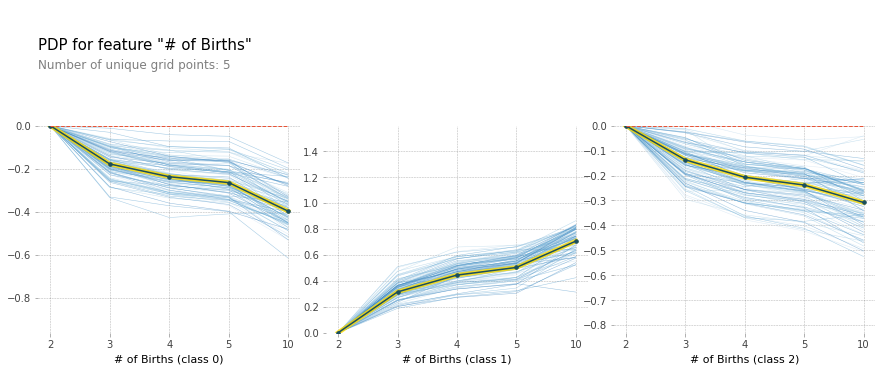

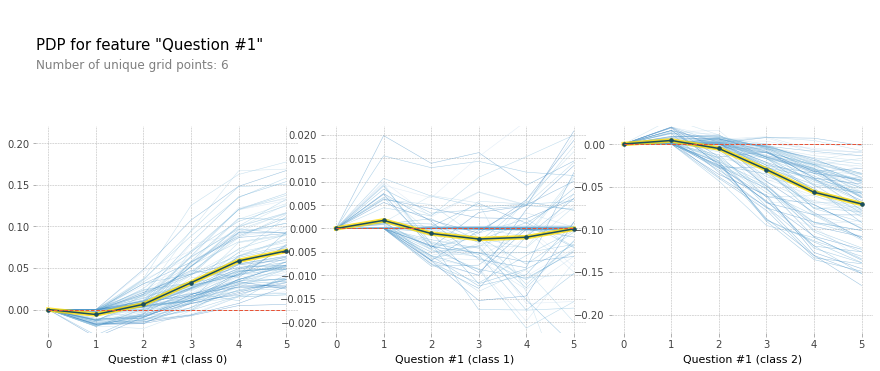

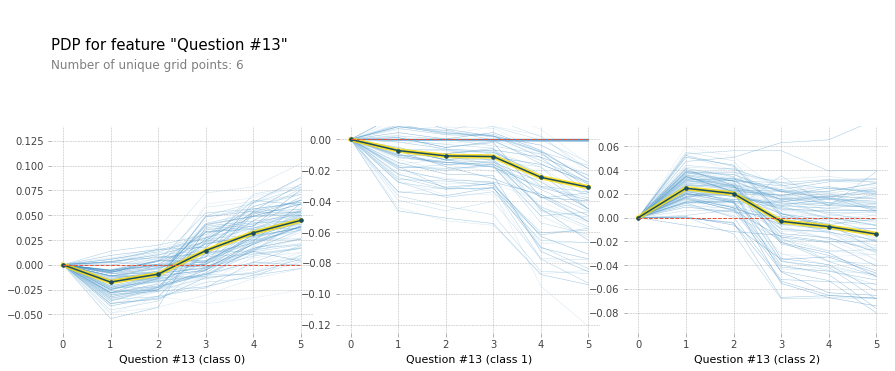

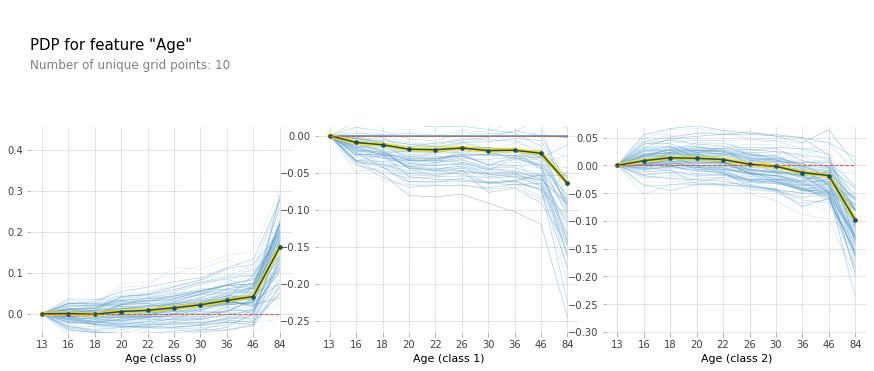

In [ ]:
for i in range(len(feature_names)):
    pdp_feat_df = pdp.pdp_isolate(\
        model=class_models['gradient_boosting']['fitted'],\
        dataset=pd.concat((X_test, y_test), axis=1),\
        model_features=X_test.columns,\
        feature=feature_names[i]
    )
    fig, axes = pdp.pdp_plot(
        pdp_isolate_out=pdp_feat_df, center=True,\
        x_quantile=True, ncols=3, plot_lines=True,\
        frac_to_plot=100, figsize=(15,6),\
        feature_name=feature_labels[i]
    )

La figure transmet quelque chose que nous avions précédemment remarqué avec l'importance de la fonctionnalité de régression logistique, mais nous avons maintenant une représentation visuelle. La probabilité d'un premier-né (classe 0) et d'un dernier-né (classe 2) diminue systématiquement à mesure que le nombre de naissances (birthn) augmente. Les probabilités d'enfant du milieu (classe 1) vont dans le sens inverse, commençant à près de 0 % car il ne peut pas y avoir d'enfant du milieu avec deux enfants ! Tout cela a du sens. Vous pouvez également dire à quel point les lignes les plus fines sont proches des lignes les plus épaisses (la moyenne) qu'il s'agit d'une caractéristique forte, avec peu de variation entre toutes les prédictions de classe. La figure 4.8 peut être consultée ici.


La figure 2 correspond à l'échelle de Likert pour Q1, "J'ai lu un nombre absurde de livres", donc pour les premiers-nés la probabilité diminue entre N/A (0) et en désaccord (1) mais la montée après dépasse le zéro (pas de changement) et augmente décidément au moment où il est passé neutre (3). Q1 pour les derniers-nés a exactement l'effet inverse. Le résultat de l'enfant moyen est plus intéressant parce que vous pouvez voir que les observations échantillonnées (lignes fines) sont partout, alors prenez cela avec un grain de sel, mais leur moyenne suggère ce qui semble être un mélange entre les premiers-nés et euh 3 et les derniers-nés avant. En d'autres termes, le désaccord total et l'accord avec Q1 suggèrent une probabilité plus élevée que les enfants du milieu se situent entre ces deux extrêmes.

Le PDP pour Q13 ("Je dirige les gens autour")  a des relations similaires avec la cible pour les premiers-nés et les derniers-nés à Q1, mais est plus prononcé à l'extrémité de désaccord de l'échelle de Likert et légèrement moins prononcé à l'autre extrémité. Il y a beaucoup moins d'ambivalence avec les enfants du milieu au Q13 qu'au Q1, cette classe étant moins probable à mesure que le niveau d'accord augmente



La figure 4 implique le PDP de la caractéristique d'âge. Nous pouvons dire que la probabilité d'être un premier-né augmente lentement et régulièrement, en moyenne, à mesure que l'âge augmente. Bien que nous puissions interpréter cela, il est difficile de trouver une explication logique car les familles étaient autrefois plus grandes, nous nous attendons donc peut-être à ce que la probabilité diminue avec l'âge. Heureusement, les quantiles peuvent fournir des indices. Notez que les graduations pour les 16-22 ans ne sont séparées que de 2 ans, mais cet espacement augmente ensuite à 4, 6, 10 et—enfin—38. Cela signifie que la répartition par âge est asymétrique, ce qui n'est pas nécessairement une mauvaise chose, mais une répartition pourrait également être inégale avec les classes de chaque groupe d'âge



Pour prouver cette hypothèse, mettons d'abord l'âge et le rang de naissance dans leur propre base de données (birthorder_abbrev_df). Ensuite, nous exploitons la fonction de coupe des pandas pour définir l'index sur les mêmes groupes d'âge dans les quantiles. Maintenant, nous sauvegardons d'abord une série (agegroup_birthorder_counts_s) regroupée par cet indice de groupe d'âge et cet ordre de naissance, et une autre (agegroup_counts_s) simplement regroupée par l'indice. Vous pouvez maintenant diviser le total des décomptes des groupes d'âge et des rangs de naissance par les décomptes des groupes d'âge, ce qui donne une série avec les pourcentages (agegroup_pct_birthorder_s). Enfin, vous pouvez utiliser unstack() pour convertir la série en une trame de données et une fonction pandas plot.bar pour la transformer en un graphique à barres empilées, comme illustré dans l'extrait de code suivant

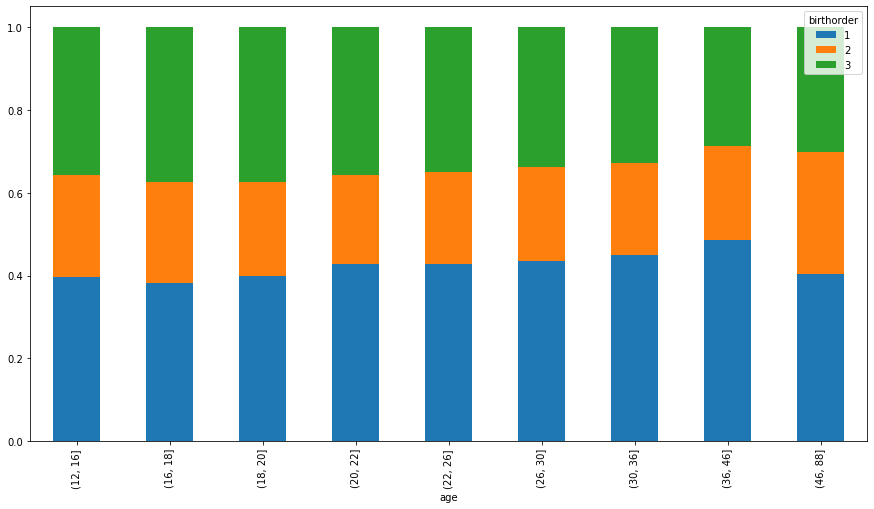

In [ ]:
birthorder_abbrev_df = birthorder_df[['age', 'birthorder']]
birthorder_abbrev_df.set_index(pd.cut(\
                                  birthorder_abbrev_df['age'],\
                                  [12, 16, 18, 20, 22, 26, 30,\
                                   36, 46, 88]), inplace=True)
agegroup_birthorder_counts_s = birthorder_abbrev_df.\
                            groupby([birthorder_abbrev_df.index,\
                                     'birthorder']).size()
agegroup_counts_s = birthorder_abbrev_df.groupby(\
                                            birthorder_abbrev_df.index)\
                                            ['birthorder'].count()
agegroup_pct_birthorder_s = agegroup_birthorder_counts_s.div(\
                                                    agegroup_counts_s,\
                                                     axis=0,level=0)
agegroup_pct_birthorder_s.unstack().plot.bar(stacked=True,\
                                         figsize=(15,8))

La figure montre comment chaque classe (ordre de naissance) est représentée dans les différents groupes d'âge. Cela peut sembler peu, mais entre 16 et 46 ans, la représentation des premiers-nés (classe 1) est passée de 38 % à près de 49 %, tandis que les derniers-nés (classe 3) sont passés de 38 % à 29 %. Pendant ce temps, les enfants du milieu (classe 2) n'ont fluctué que de 3 %. Tout cela est contre-intuitif d'après ce que nous savons de la démographie car nous savons qu'au cours des 75 années couvrant ces tranches d'âge, le nombre moyen d'enfants par famille a diminué d'au moins deux enfants dans les pays représentés et de près d'un enfant dans les 50 derniers de ces 75 ans. En théorie, cela signifie que la probabilité d'être un premier ou un dernier-né devrait avoir diminué à mesure que l'âge augmente, tandis que la probabilité d'être un enfant du milieu augmente.

Une hypothèse plausible serait que les premiers-nés sont surreprésentés dans les groupes plus âgés parce qu'ils sont de plus en plus susceptibles de participer à ces quiz en ligne pour commencer, et le modèle a pris en compte ce biais. Qu'il y ait un biais ou non, nous devons traiter les déséquilibres de classe pertinents. Nous aborderons les biais plus en profondeur au chapitre 11, Méthodes d'atténuation des biais et d'inférence causale, lorsque nous apprendrons à tirer parti des données démographiques pour réduire le déséquilibre des classes, et donc les biais de modèle qu'ils provoquent.

## Interaction PDPs

PDP peut également être appliqué à plusieurs entités à la fois, ce qui peut être utile pour examiner comment l'interaction de deux entités est liée à la variable cible. Nous pouvons également utiliser PDPbox pour générer un graphique d'interaction PDP. Sa fonction pdp_interact est très similaire à pdp_interact et a tous les mêmes paramètres, sauf que feature est une liste de fonctionnalités. En plus de choisir birthn et Q1 comme fonctionnalités, nous avons le paramètre n_jobs=-1, qui exploite tous nos processeurs pour calculer en parallèle. pdp_interact produira une trame de données pdp_birthn_Q1_df. Maintenant, nous devons le tracer avec pdp_interact_plot. Pour pdp_interact_plot, vous verrez des paramètres similaires à pdp_plot. Par exemple, pdp_interact_out est analogue à pdp_isolate_out, en prenant la trame de données produite à partir de l'étape précédente ; et feature_names est comme feature_name mais prend une liste d'étiquettes de caractéristiques, pas une seule étiquette. plot_type='grid' lui dit de générer une grille, ce qui est idéal pour les caractéristiques à faible cardinalité ou ordinales telles que birthn et Q1

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


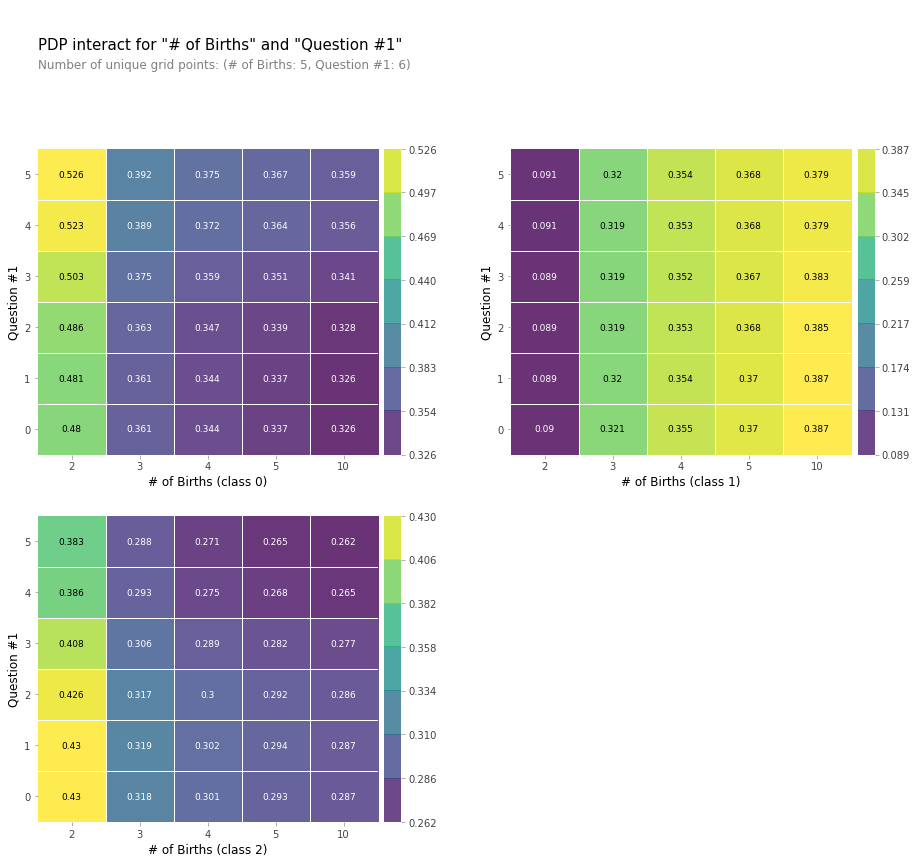

In [ ]:
pdp_birthn_Q1_df = pdp.pdp_interact(
    model=class_models['random_forest']['fitted'],\
    dataset=pd.concat((X_test, y_test), axis=1),\
    model_features=X_test.columns, features=['birthn','Q1'],\
    n_jobs=-1
)
fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=pdp_birthn_Q1_df,\
    plot_type='grid', x_quantile=True,\
    ncols=2, figsize=(15,15),\
    feature_names=['# of Births','Question #1']
)

Dans la figure générée à la suite du code précédent, vous pouvez dire par la grille à code couleur que la probabilité moyenne des premiers-nés (classe 0) augmente à mesure que le nombre de naissances (birthn) diminue et que la concordance avec Q1 augmente. Pour les derniers-nés (classe 2), c'est la même chose pour les naissances, mais exactement l'inverse pour Q1. Jusqu'à présent, ces interactions ne devraient pas être surprenantes car c'est comme si vous aviez combiné les PDP individuels pour chacune de ces fonctionnalités. Cependant, avec les enfants du milieu (classe 1), le graphique Q1 était un peu ambivalent, mais il est important de noter comment une caractéristique peut contrecarrer l'effet moyen d'une autre. Une fois que vous le voyez interagir avec birthn, la probabilité se déplace principalement dans une direction, augmentant avec la fonction birthn

PDPbox a un autre type de tracé d'interaction PDP appelé contour, et celui-ci est plus adapté aux caractéristiques de cardinalité supérieure ou continues, nous utiliserons donc cette fois l'âge et le testelapse (test de prise de temps). Le code pour générer le tracé est exactement le même que pour le précédent, à l'exception des différentes fonctionnalités, feature_names et plot_type. Le code est illustré dans l'extrait suivant

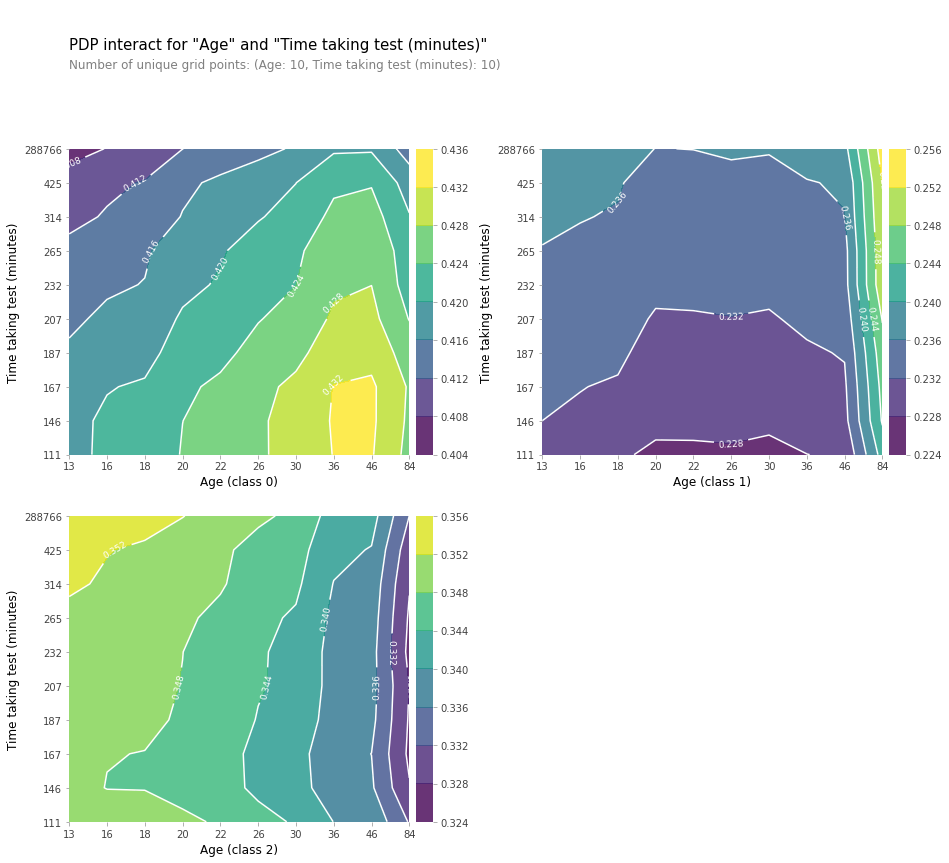

In [ ]:
pdp_age_testelapse_df = pdp.pdp_interact(
    model=class_models['random_forest']['fitted'],\
    dataset=pd.concat((X_test, y_test), axis=1),\
    model_features=X_test.columns, features=['age','testelapse'],\
    n_jobs=-1
)
fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=pdp_age_testelapse_df,\
    plot_type='contour', x_quantile=True,\
    ncols=2, figsize=(15,15),\
    feature_names=['Age','Time taking test (minutes)']
)

La figure montre que la probabilité d'avoir des premiers-nés (classe 0) augmente à mesure que le temps passé à passer le test diminue et que l'âge augmente, donc si vous êtes plus âgé et plus rapide à passer le test, il y a plus de chances que vous soyez un premier-né. Les derniers-nés (classe 2) sont plus ou moins l'inverse : si vous êtes plus lent pendant que vous êtes plus jeune, plus vous avez de chances d'être un dernier-né. Les enfants du milieu (classe 1) augmentent davantage dans une direction, devenant légèrement plus probables à mesure que le testelapse augmente, sauf lorsque l'âge est supérieur à 46 ans et que la probabilité augmente rapidement avec l'âge

## Les inconvénients principaux de PDP

PDP sont qu'il ne peut afficher que deux caractéristiques à la fois et qu'il suppose l'indépendance des caractéristiques lorsqu'elles peuvent être corrélées les unes aux autres. Pour résoudre le problème de l'indépendance, nous couvrirons les graphiques d'effets locaux accumulés (ALE) dans le prochain chapitre. Comme nous l'avons appris dans cette section, les PDP sont parfaits pour voir comment, en moyenne, les caractéristiques se rapportent à la cible. , mais que se passe-t-il si nous voulons visualiser la relation désagrégée (en d'autres termes, chaque observation individuelle plutôt qu'une moyenne) ? Cette agrégation est un autre inconvénient et c'est précisément à cela que servent les tracés ICE, et nous les couvrirons brièvement ensuite

## Explication des tracés ICE

Les tracés ICE sont la réponse à la question : et si mes tracés PDP obscurcissaient la variance dans mes relations entité-cible ? En effet, lorsque vous essayez de comprendre comment une caractéristique est liée à la prédiction d'un modèle, beaucoup de choses peuvent être perdues en faisant la moyenne. Si vous examinez de près les tracés PDP pour les entités individuelles, beaucoup d'entre eux ont des lignes fines qui sont non seulement éloignées de la ligne épaisse moyenne, mais ne suivent même pas sa direction générale. Ces variations peuvent fournir des informations supplémentaires - et, soit dit en passant, les lignes fines sont essentiellement ce que sont les tracés ICE, sauf que vous pouvez faire beaucoup plus avec eux


Les tracés ICE peuvent inclure tous vos ensembles de données, mais avoir de nombreuses lignes dans vos tracés peut être coûteux en calcul et, plus important encore, difficile à apprécier. C'est pourquoi il est recommandé d'échantillonner votre ensemble de données ou de tracer les lignes avec transparence

Nous utiliserons les deux approches, mais commençons par échantillonner l'ensemble de données. Nous définissons d'abord la graine aléatoire avec np.random.seed pour la reproductibilité, puis nous définissons sample_size à 10 % de l'ensemble de données et utilisons sample_idx pour sélectionner au hasard les 10 % d'indices qui seront représentés dans nos parcelles ICE. Ensuite, nous sauvegardons les observations échantillonnées dans un nouveau dataframe (X_test_samp)

In [ ]:
np.random.seed(rand)
sample_size = 0.1
sample_idx = np.random.choice(\
                    X_test.shape[0],\
                    math.ceil(X_test.shape[0]*sample_size),\
                    replace=False)
X_test_samp = X_test.iloc[sample_idx,:]

L'implémentation Python ICE que nous utilisons par défaut utilise la fonction de prédiction, ce qui est idéal pour les problèmes de régression. Pourtant, pour la classification, vous vous retrouvez avec des lignes droites les unes sur les autres, allant vers l'une des trois classes possibles. Pour résoudre ce problème, vous pouvez utiliser predict_proba à la place, qui renvoie les probabilités prédites. Cependant, cela renvoie trois ensembles de probabilités prédites, et l'implémentation ne peut pas comprendre cela. Pour résoudre ce problème, nous pouvons créer nos fonctions de prédiction, une par classe, comme suit

In [ ]:
def predict_prob_first_born(test_df):
    return class_models['random_forest']['fitted'].\
                                predict_proba(test_df)[:,0]
def predict_prob_middle_child(test_df):
    return class_models['random_forest']['fitted'].\
                                predict_proba(test_df)[:,1]
def predict_prob_last_born(test_df):
    return class_models['random_forest']['fitted'].\
                                predict_proba(test_df)[:,2]

Comme vous pouvez le constater en examinant les trois fonctions predict_prob, nous utilisons le modèle ajusté pour random_forest et l'ensemble de données de test pour illustrer ICE. Maintenant, nous pouvons utiliser une fonction mldatasets (plot_data_vs_ice) qui peut calculer et tracer des tracés ICE sous un avec les données utilisées pour générer les tracés. Sur l'axe des x, nous pouvons utiliser notre fonction de naissance. Pour rendre cet exercice plus amusant, nous allons même coder en couleur les lignes en fonction des réponses à Q1. À cette fin, créons d'abord un dictionnaire avec l'échelle de Likert (legend_key), que nous utiliserons comme légende pour Q1, comme suit

In [ ]:
legend_key = {0:'N/A', 1:'Disagree', 2:'Somewhat Disagree',
              3:'Neutral', 4:'Somewhat Agree', 5:'Agree'}

Ensuite, nous utilisons la fonction plot_data_vs_ice pour générer les graphiques. Si vous êtes curieux, sous le capot, il utilise la bibliothèque pycebox pour tracer le tracé ICE. Nous n'entrerons pas dans les détails sur la façon d'exploiter cette bibliothèque directement car nous nous concentrons sur l'interprétation, mais vous pouvez consulter le didacticiel ici : https://github.com/AustinRochford/PyCEbox/


Les deux premiers arguments requis par la fonction plot_data_vs_ice sont la fonction de prédiction et une étiquette à mettre sur l'axe des y. L'étiquette se rapporte à ce qui est prédit avec la fonction de prédiction. Il nécessite également les données X utilisées pour les prédictions, le nom de l'entité à tracer sur l'axe des x (feature_name) et son étiquette (feature_label). En option, nous pouvons spécifier une fonctionnalité à utiliser pour le codage couleur (color_by) et notre légende pour cette fonctionnalité (legend_key). Nous allons d'abord générer un graphique de probabilité prédite pour les premiers-nés, comme suit

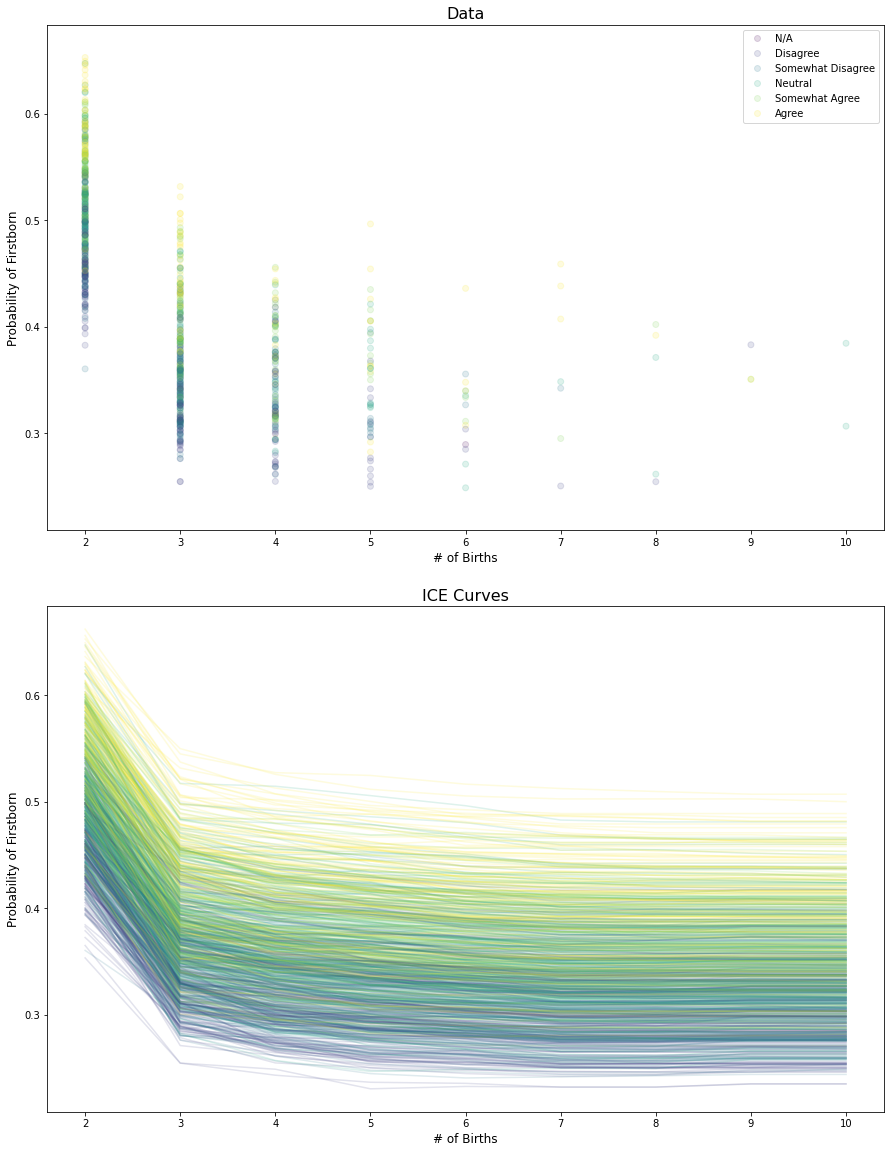

In [ ]:
mldatasets.plot_data_vs_ice(predict_prob_first_born,\
                            'Probability of Firstborn',\
                            X=X_test_samp, feature_name='birthn',\
                            feature_label='# of Births',\
                            color_by='Q1', legend_key=legend_key)

Vous pouvez dire que la figure 2 relie les points de la figure 1 en modifiant les valeurs de birthn pour chaque observation afin qu'elles correspondent aux valeurs de l'axe des x. De plus, les lignes de tracé ICE illustrent un échantillon de la variation qu'il y a dans la relation entre la naissance et le rang de naissance des premiers-nés. Le code couleur visible une fois le code exécuté enrichit l'interprétation. Vous pouvez dire que de nombreuses lignes violettes et bleues sont irrégulières, voire non monotones, et ont tendance à avoir des probabilités globales plus faibles, tandis que les jaunes et les verts sont plus cohérents et plus élevés. Il semble que plus vous êtes en désaccord avec l'affirmation de Q1 ("J'ai lu un nombre absurde de livres"), moins la naissance est fiable pour prédire un premier-né


Nous pouvons maintenant faire la même chose pour middle_child avec le même code, sauf que nous remplaçons les deux premiers arguments dans la fonction plot_data_vs_ice, comme suit

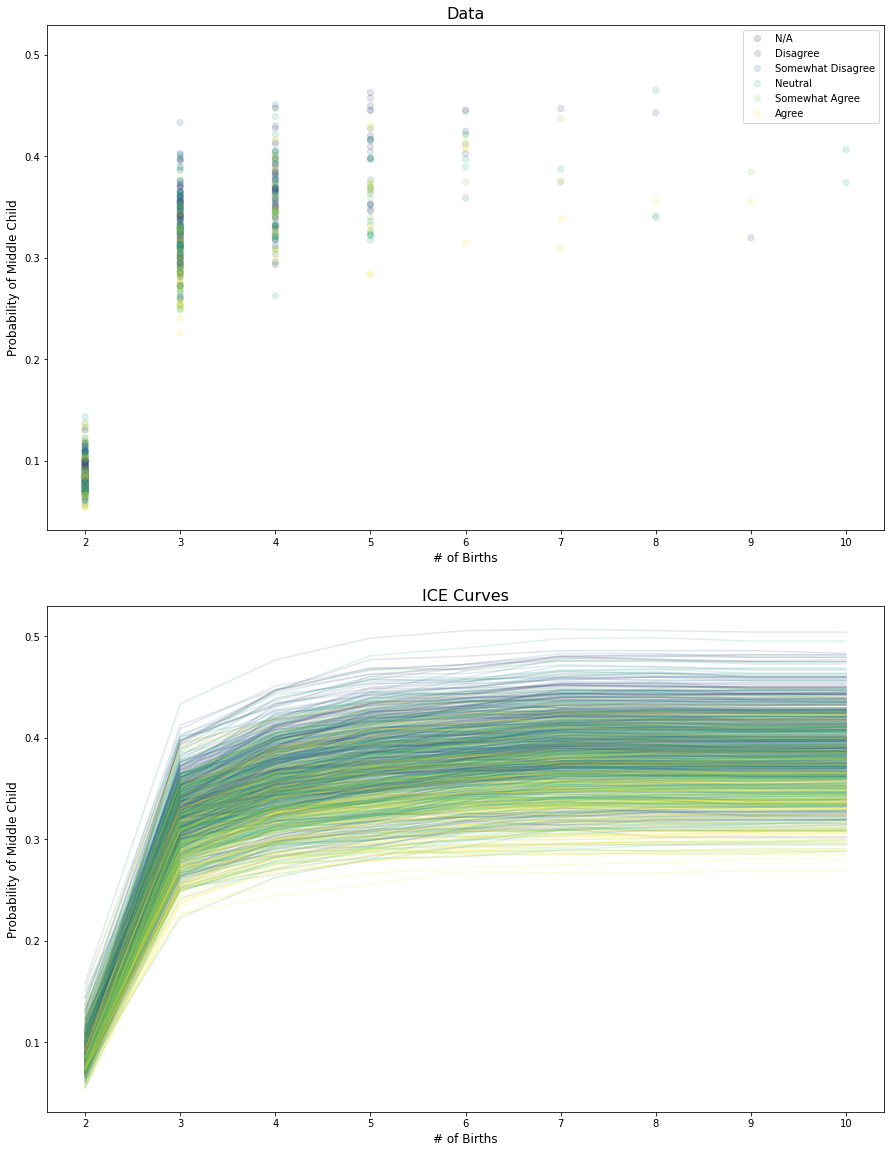

In [ ]:
mldatasets.plot_data_vs_ice(predict_prob_middle_child,\
                            'Probability of Middle Child',\
                            X=X_test_samp, feature_name='birthn',\
                            feature_label='# of Births',\
                            color_by='Q1', legend_key=legend_key)

Les courbes ICE pour l'enfant du milieu de la figure sont plus cohérentes que celles pour les premiers-nés. Toutes les lignes augmentent brusquement de 2 à 3, puis progressivement de 3 à 6, puis plafonnent. Le code couleur suggère que plus ils sont d'accord avec l'énoncé de la Q1, moins il est probable qu'ils soient des enfants du milieu, quel que soit leur âge. Enfin, essayons de faire la même chose pour les derniers-nés que nous l'avons fait pour l'autre deux classes, comme suit

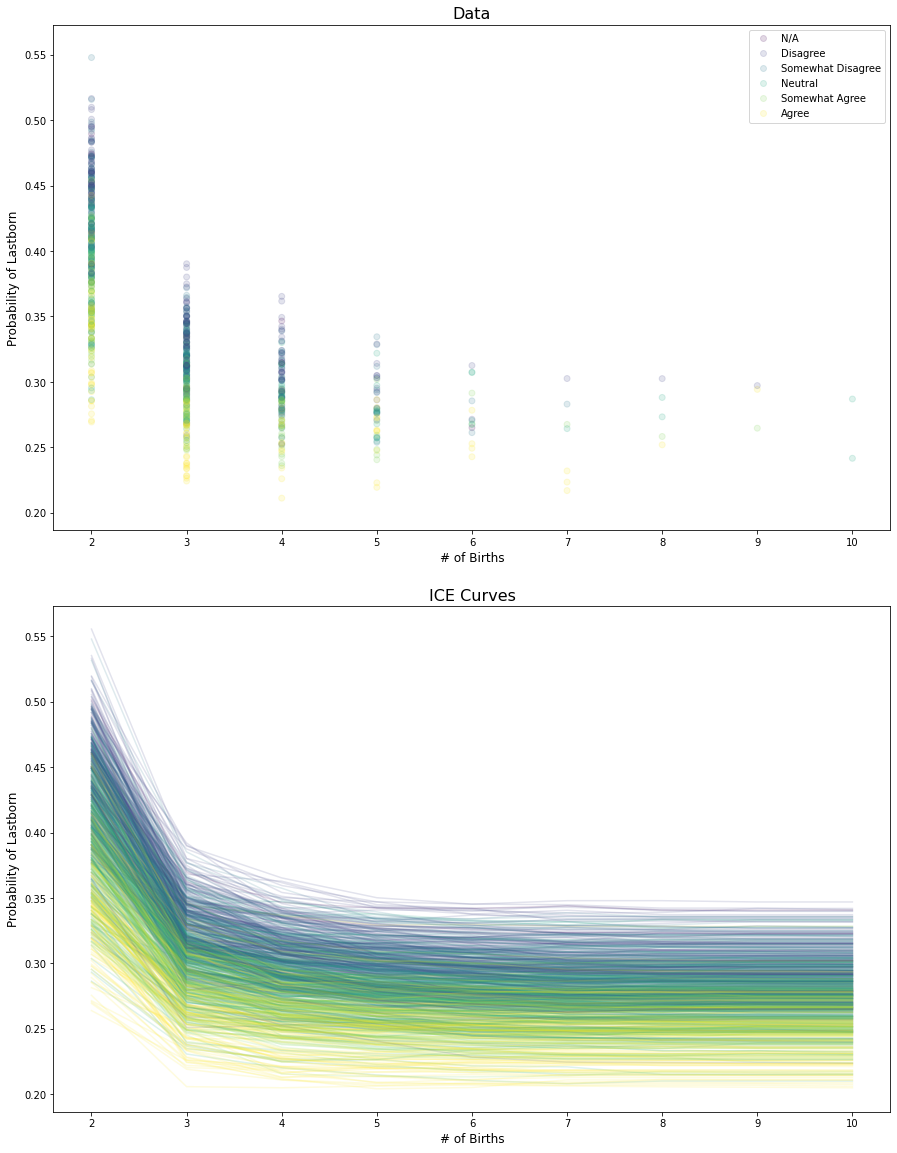

In [ ]:
mldatasets.plot_data_vs_ice(predict_prob_last_born,\
                            'Probability of Lastborn',\
                            X=X_test_samp, feature_name='birthn',\
                            feature_label='# of Births',\
                            color_by='Q1', legend_key=legend_key)

Le graphique ICE pour la probabilité des derniers-nés de la figure présente encore plus de variations que pour les premiers-nés. Cependant, comme pour les premiers-nés, moins en accord avec Q1, plus les lignes peuvent être irrégulières, mais, contrairement aux premiers-nés, l'accord avec Q1 coïncide avec moins de probabilité, peu importe combien de naissances

## Les inconvénients des courbes ICE

ICE, comme les PDP, supposent l'indépendance des caractéristiques, elles partagent donc les mêmes inconvénients. En plus de cela, avec ICE, vous ne pouvez pas interagir avec deux fonctionnalités continues ou à cardinalité élevée. Par exemple, nous avons pu coder par couleur pour Q1 mais uniquement parce qu'il y a six valeurs possibles pour Q1. Un autre inconvénient est qu'il est difficile de déterminer la relation moyenne entre une caractéristique et une cible, mais c'est à cela que servent les tracés PDP. En fin de compte, ce que les graphiques ICE excellent, c'est la recherche d'indices sur la variation de cette relation, et non sur son agrégat

## Mission accomplie : 

la mission consistait à déterminer ce que l'apprentissage automatique pouvait découvrir à partir d'un ensemble de données de 40 000 entrées de quiz. Les chercheurs en psychologie voulaient savoir s'ils pouvaient utiliser ces données en toute confiance pour tracer la voie à suivre pour leurs recherches. Ils voulaient également savoir si l'interprétation de l'apprentissage automatique leur montrerait quelles caractéristiques et valeurs de caractéristiques avaient le plus d'impact sur le résultat. 

En utilisant les PDP, nous avons découvert qu'il y avait des écarts avec la distribution de l'âge et du rang de naissance, puisque la proportion d'enfants du milieu doit augmenter avec l'âge. Si un exercice de modélisation doit fonctionner dans des scénarios du monde réel, les données d'entraînement doivent correspondre aux distributions du monde réel. 


Tout n'est pas perdu, cependant. Vous pouvez prendre des mesures correctives en équilibrant ces distributions. Des changements importants doivent probablement être apportés aux données pour les rendre plus fiables à des fins de recherche. Cela étant dit, puisqu'il s'agit d'un quiz en ligne réalisé de manière anonyme, vous pouvez vous attendre à ce que le mensonge soit monnaie courante, donc la marge d'erreur doit être définie en conséquence. 

Quant aux questions de transparence, selon PFI le nombre de naissances (birthn) était le caractéristique de loin la plus importante. Cependant, l'exercice a réussi à identifier des questions telles que Q1 ("J'ai lu un nombre absurde de livres") et Q13 ("Je dirige les gens autour") qui sont constamment en corrélation avec l'ordre de naissance, et à valider leur impact avec les tracés ICE. Nous avons également découvert des interactions passionnantes entre l'âge et le temps passé à passer le test (testelapse), à ​​l'aide de PDP. 

Une fois les problèmes de distribution résolus avec l'âge, cela deviendra peut-être plus évident